In [1]:
import pandas as pd

In [2]:
#read both files and get the data with common reg ids
# We can change the data files accordingly to get the distribution for the selected data.
requests_movement_df = pd.read_csv("../Data/merged_eaol_reduced_classes_30.csv")

In [3]:
print("Total original reg id",len(requests_movement_df))

Total original reg id 29365


In [4]:
requests_movement_df.columns

Index(['Unnamed: 0', 'action_name', 'action_srno', 'date_of_action',
       'org_name', 'org_name2', 'registration_no', 'remarks',
       'Parent_org_name', 'Apex_org_name', 'encoded_y', 'country_name',
       'distname', 'state_name', 'subject_content'],
      dtype='object')

In [13]:
# Plot department distribution
def get_encoded_values(x):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(x)
    return label_encoder.transform(x)

def getFrequencyPlot(request_df,limit,column_name):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    #print(action_counts)
    action_counts = request_df[column_name].value_counts()
    sns.set(style="darkgrid")
    snsplot = sns.barplot(action_counts.index, action_counts.values, alpha=0.4,\
                         order = request_df[column_name].unique())
    plt.setp(snsplot.get_xticklabels(), rotation=90)

    plt.title('Frequency Distribution of'+column_name+ ' with '+limit)
    plt.ylabel('Number of Occurrences', fontsize=10)
    plt.xlabel(column_name, fontsize=10)
    plt.show()
    


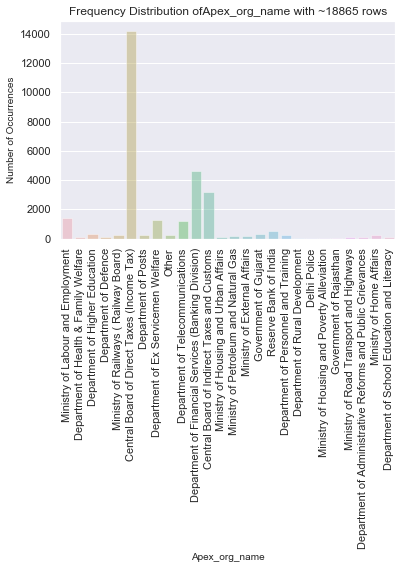

In [14]:
encoded_column_names = ['Apex_org_name']
y_column = 'Apex_org_name'
features_df_without_int = pd.DataFrame()
for column in encoded_column_names: #looks like encoding is beneficial only for these columns
    features_df_without_int[column] = get_encoded_values(requests_movement_df[column])                                                       

getFrequencyPlot(requests_movement_df,limit='~18865 rows',column_name=y_column)